# Hashtag recommender project

2 approaches are possible:
* LDA - Latent Dirichtlet Allocation - for topic modelling, supports online relearning
* Classifier approach
    * KNN - recommend hashtags based on most similar documents, compare similarity with cosine-sim. and bag-of-words(tf-idf)
    * SVM - same principle
* BM25 approach 
    * based ond most simmilar documents
    * recommend hashtags of K most simmilar documents (I experiment with k=5)
    * needs to be kept up to date - retrain regularly (easy)

## LDA approach

LDA solves topic-discovery problems. It finds words which are used in specific contexts. 
Hashtags from LDA might help summarizing text. 

In [1]:
from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation

from matplotlib import pyplot as plt

import statistics as st

In [2]:
n_samples = 2000
n_features = 1000
n_components = 10
n_top_words = 20
batch_size = 128

In [3]:
data, _ = fetch_20newsgroups(
    shuffle=True,
    random_state=1,
    remove=("headers", "footers", "quotes"),
    return_X_y=True,
)
data_samples = data[:n_samples]

In [4]:
tf_vectorizer = CountVectorizer(
    max_df=0.8, min_df=2, max_features=n_features, stop_words="english"
)
tf = tf_vectorizer.fit_transform(data_samples)

In [5]:
tf

<2000x1000 sparse matrix of type '<class 'numpy.int64'>'
	with 51752 stored elements in Compressed Sparse Row format>

In [6]:
def plot_top_words(model, feature_names, n_top_words, title):
    fig, axes = plt.subplots(2, 5, figsize=(30, 15), sharex=True)
    axes = axes.flatten()
    popular_topic_names = {}
    for topic_idx, topic in enumerate(model.components_):
        top_features_ind = topic.argsort()[: -n_top_words - 1 : -1]
        top_features = [feature_names[i] for i in top_features_ind]
        weights = topic[top_features_ind]
        median_weight = st.median(weights)
        
        popular_topic_names[topic_idx] = [ i[1] for i in filter(lambda x: x[0] > median_weight, zip(weights,top_features))]

        ax = axes[topic_idx]
        ax.barh(top_features, weights, height=0.7)
        ax.set_title(f"Topic {topic_idx +1}", fontdict={"fontsize": 30})
        ax.invert_yaxis()
        ax.tick_params(axis="both", which="major", labelsize=20)
        for i in "top right left".split():
            ax.spines[i].set_visible(False)
        fig.suptitle(title, fontsize=40)

    plt.subplots_adjust(top=0.90, bottom=0.05, wspace=0.90, hspace=0.3)
    plt.show()
    return popular_topic_names



 Fitting LDA models with tf features, n_samples=2000 and n_features=1000...


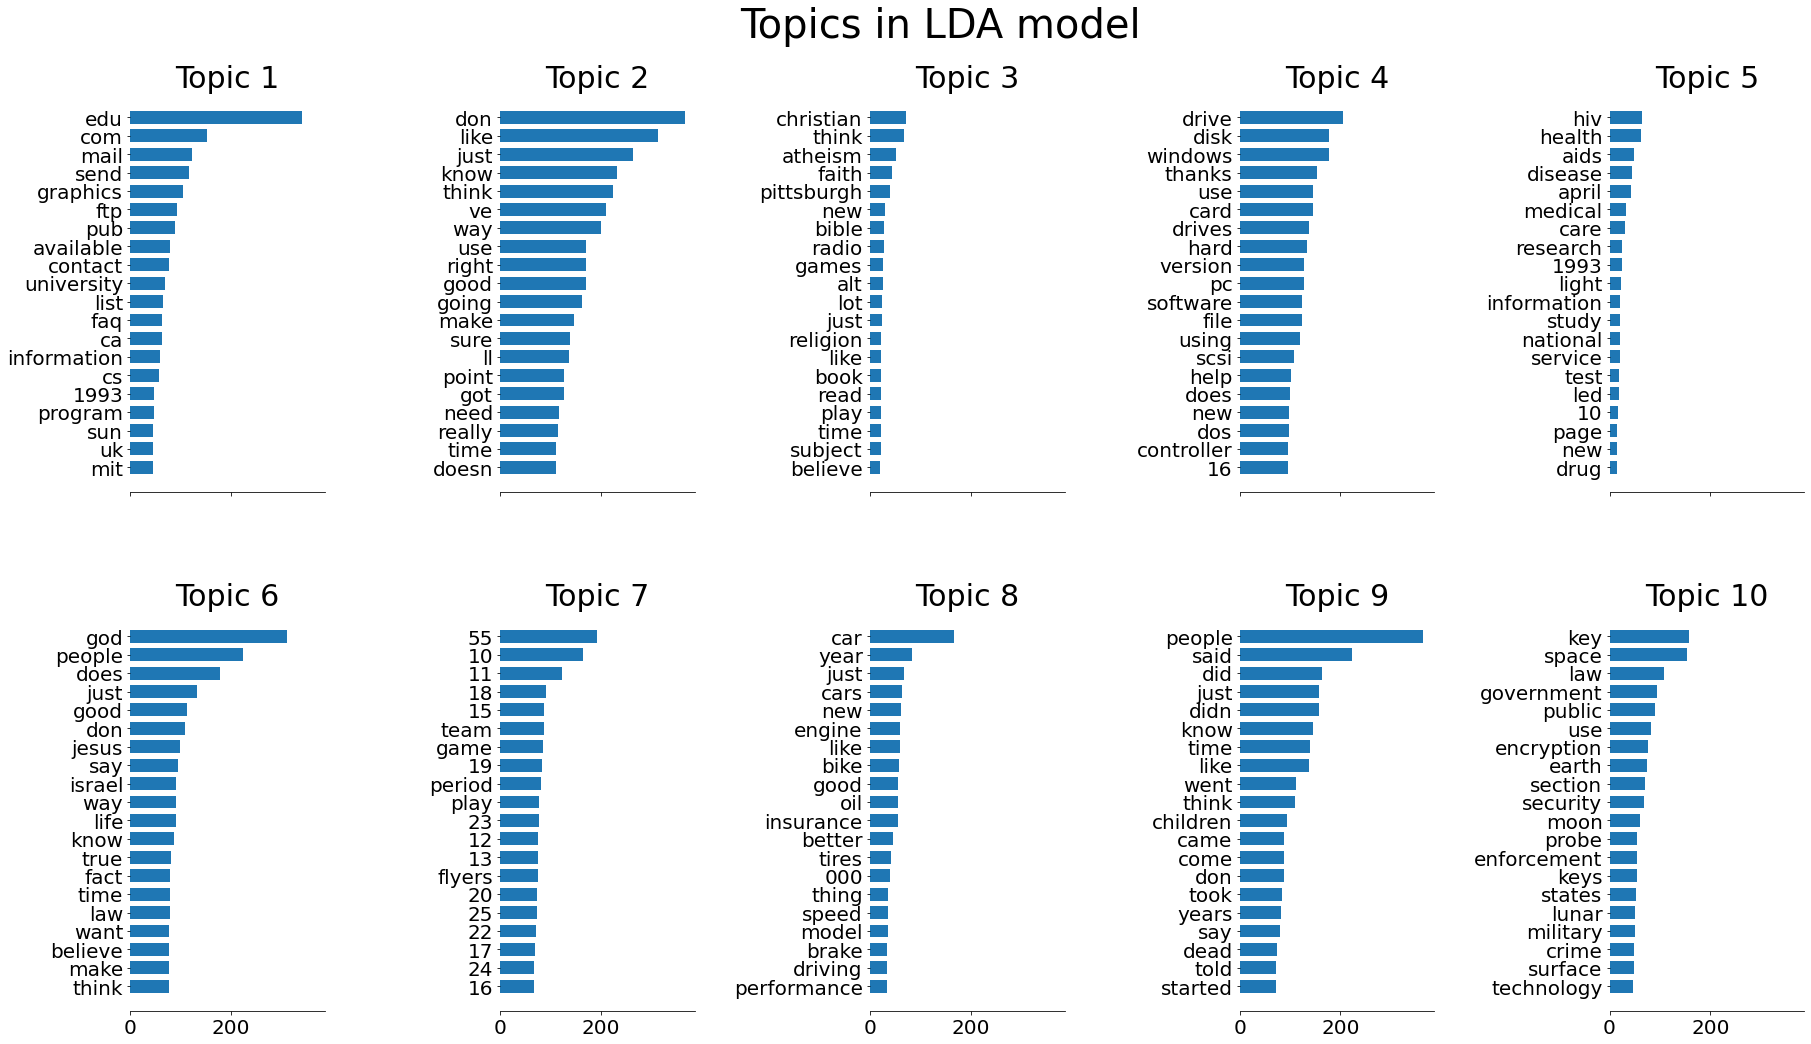

In [7]:
print(
    "\n" * 2,
    "Fitting LDA models with tf features, n_samples=%d and n_features=%d..."
    % (n_samples, n_features),
)
lda = LatentDirichletAllocation(
    n_components=n_components,
    max_iter=5,
    learning_method="online",
    learning_offset=50.0,
    random_state=0,
)
lda.fit(tf)

tf_feature_names = tf_vectorizer.get_feature_names_out()
found_topics = plot_top_words(lda, tf_feature_names, n_top_words, "Topics in LDA model")

In [8]:
lda

LatentDirichletAllocation(learning_method='online', learning_offset=50.0,
                          max_iter=5, random_state=0)

### find 10 most representative hashtags for context

In [9]:
sample = data_samples[0]
sample

"Well i'm not sure about the story nad it did seem biased. What\nI disagree with is your statement that the U.S. Media is out to\nruin Israels reputation. That is rediculous. The U.S. media is\nthe most pro-israeli media in the world. Having lived in Europe\nI realize that incidences such as the one described in the\nletter have occured. The U.S. media as a whole seem to try to\nignore them. The U.S. is subsidizing Israels existance and the\nEuropeans are not (at least not to the same degree). So I think\nthat might be a reason they report more clearly on the\natrocities.\n\tWhat is a shame is that in Austria, daily reports of\nthe inhuman acts commited by Israeli soldiers and the blessing\nreceived from the Government makes some of the Holocaust guilt\ngo away. After all, look how the Jews are treating other races\nwhen they got power. It is unfortunate.\n"

In [10]:
tf_vectorizer

CountVectorizer(max_df=0.8, max_features=1000, min_df=2, stop_words='english')

In [11]:
sample_tf = tf_vectorizer.transform([sample])

In [12]:
topics = lda.transform(sample_tf)
topics

array([[0.00344893, 0.6285982 , 0.00344908, 0.00344877, 0.00344865,
        0.34381098, 0.00344842, 0.00344869, 0.00344944, 0.00344884]])

In [13]:
found_topics

{0: ['edu',
  'com',
  'mail',
  'send',
  'graphics',
  'ftp',
  'pub',
  'available',
  'contact',
  'university'],
 1: ['don',
  'like',
  'just',
  'know',
  'think',
  've',
  'way',
  'use',
  'right',
  'good'],
 2: ['christian',
  'think',
  'atheism',
  'faith',
  'pittsburgh',
  'new',
  'bible',
  'radio',
  'games',
  'alt'],
 3: ['drive',
  'disk',
  'windows',
  'thanks',
  'use',
  'card',
  'drives',
  'hard',
  'version',
  'pc'],
 4: ['hiv',
  'health',
  'aids',
  'disease',
  'april',
  'medical',
  'care',
  'research',
  '1993',
  'light'],
 5: ['god',
  'people',
  'does',
  'just',
  'good',
  'don',
  'jesus',
  'say',
  'israel',
  'way'],
 6: ['55', '10', '11', '18', '15', 'team', 'game', '19', 'period', 'play'],
 7: ['car',
  'year',
  'just',
  'cars',
  'new',
  'engine',
  'like',
  'bike',
  'good',
  'oil'],
 8: ['people',
  'said',
  'did',
  'just',
  'didn',
  'know',
  'time',
  'like',
  'went',
  'think'],
 9: ['key',
  'space',
  'law',
  'govern

In [14]:
sorted([(topic,idx,found_topics[idx]) for idx,topic in enumerate(topics[0])],key= lambda x:x[0],reverse=True)[:3]

[(0.6285981960257254,
  1,
  ['don',
   'like',
   'just',
   'know',
   'think',
   've',
   'way',
   'use',
   'right',
   'good']),
 (0.3438109839079597,
  5,
  ['god',
   'people',
   'does',
   'just',
   'good',
   'don',
   'jesus',
   'say',
   'israel',
   'way']),
 (0.003449435144395788,
  8,
  ['people',
   'said',
   'did',
   'just',
   'didn',
   'know',
   'time',
   'like',
   'went',
   'think'])]

We can see that there are 2 major topics. We can just recommend from 3 most popular topics:

In [15]:
rec = sorted([(topic,idx,found_topics[idx]) for idx,topic in enumerate(topics[0])],key= lambda x:x[0],reverse=True)[:3]
rec = [j for i in rec for j in i[2]]
rec

['don',
 'like',
 'just',
 'know',
 'think',
 've',
 'way',
 'use',
 'right',
 'good',
 'god',
 'people',
 'does',
 'just',
 'good',
 'don',
 'jesus',
 'say',
 'israel',
 'way',
 'people',
 'said',
 'did',
 'just',
 'didn',
 'know',
 'time',
 'like',
 'went',
 'think']

This approach returns **found** topics. The problem is, these sugestions would not make much sense if found as hashtags

## Classifiers
compare distances of (or similar documents with hashtags) hashtags with text and recommend

### KNN - distance based approach
General idea:
1. have train set 
2. create tfidf repre
3. get test sample
4. compute tfidf
5. find K-most similar docs - cosine similarity might work well (knn clasifier with cosine similarity?)
6. recommend those hashtags - sorted by confidence



In [16]:
from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.neighbors import KNeighborsClassifier

In [17]:
train_X,train_y = fetch_20newsgroups(subset='train',return_X_y=True,remove=('headers', 'footers', 'quotes'))
test_X,test_y = fetch_20newsgroups(subset='test',return_X_y=True,remove=('headers', 'footers', 'quotes'))
real_labels = fetch_20newsgroups().target_names

In [18]:
real_labels

['alt.atheism',
 'comp.graphics',
 'comp.os.ms-windows.misc',
 'comp.sys.ibm.pc.hardware',
 'comp.sys.mac.hardware',
 'comp.windows.x',
 'misc.forsale',
 'rec.autos',
 'rec.motorcycles',
 'rec.sport.baseball',
 'rec.sport.hockey',
 'sci.crypt',
 'sci.electronics',
 'sci.med',
 'sci.space',
 'soc.religion.christian',
 'talk.politics.guns',
 'talk.politics.mideast',
 'talk.politics.misc',
 'talk.religion.misc']

In [19]:
len(real_labels)

20

In [20]:
train_X[0]

'I was wondering if anyone out there could enlighten me on this car I saw\nthe other day. It was a 2-door sports car, looked to be from the late 60s/\nearly 70s. It was called a Bricklin. The doors were really small. In addition,\nthe front bumper was separate from the rest of the body. This is \nall I know. If anyone can tellme a model name, engine specs, years\nof production, where this car is made, history, or whatever info you\nhave on this funky looking car, please e-mail.'

In [21]:
len(train_X)

11314

In [22]:
set(train_y)

{0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19}

In [23]:
len(train_y)

11314

In [24]:
vectorizer = TfidfVectorizer(max_df=0.9,min_df=0.1,sublinear_tf=True)
train_bag = vectorizer.fit_transform(train_X)

In [25]:
train_bag

<11314x113 sparse matrix of type '<class 'numpy.float64'>'
	with 306610 stored elements in Compressed Sparse Row format>

In [26]:
neigh = KNeighborsClassifier(n_neighbors=3,metric='cosine',weights='distance')
neigh.fit(train_bag, train_y)

KNeighborsClassifier(metric='cosine', n_neighbors=3, weights='distance')

In [27]:
test_bag = vectorizer.transform(test_X)
neigh.predict(test_bag[0])

array([12])

In [28]:
[ (idx, score) for idx,score in enumerate(neigh.predict_proba(test_bag[0])[0])]

[(0, 0.0),
 (1, 0.0),
 (2, 0.0),
 (3, 0.0),
 (4, 0.0),
 (5, 0.0),
 (6, 0.0),
 (7, 0.0),
 (8, 0.3358320324140883),
 (9, 0.0),
 (10, 0.0),
 (11, 0.0),
 (12, 0.34301757511579894),
 (13, 0.0),
 (14, 0.3211503924701127),
 (15, 0.0),
 (16, 0.0),
 (17, 0.0),
 (18, 0.0),
 (19, 0.0)]

In [29]:
test_y[0]

7

In [30]:
neigh.score(train_bag,train_y)

0.9644687997171646

In [31]:
neigh.score(test_bag, test_y)

0.14298990971853426

In [32]:
scores, nearest = neigh.kneighbors(test_bag[0],5)
scores, nearest

(array([[0.36660335, 0.37444728, 0.39156543, 0.39291801, 0.39646701]]),
 array([[  386,  7548,  9047,  2290, 10275]]))

In [33]:
test_X[0]

'I am a little confused on all of the models of the 88-89 bonnevilles.\nI have heard of the LE SE LSE SSE SSEI. Could someone tell me the\ndifferences are far as features or performance. I am also curious to\nknow what the book value is for prefereably the 89 model. And how much\nless than book value can you usually get them for. In other words how\nmuch are they in demand this time of year. I have heard that the mid-spring\nearly summer is the best time to buy.'

In [34]:
[train_X[i] for i in nearest[0]]

["Sci.E(E) netters:\n\nI am setting out to build and market a small electronic device that \nrequires an LCD display.  All of the analog electronics are working \nfine, I have ordered a PIC ICE (not vice versa) since the PICs are so \ncheap and low-power, but I am having a devil of a time finding any \nLCD displays in the 6-8 digit range that are priced as low as I need.  I \nam looking for somthing in the range of $1 in quantities of about \n1000-10,000.\n\nMainstream distributors like Almac cannot help me without a part \nnumber, or when they do look around for something in their line \nthey find a $15 8-digit LCD.  Even Digikey's cheapest offering is $5 in \nquantity.\n\nI know LCD displays like this must exist because I see whole \ncalculators for sale for $4.99, meaning the retailer probably buys it \nfor $3.50 and the wholesaler probably gets it for $2.50 or so.  This \n$2.50 includes assembly labor, packaging, sales, transportation, \nimport duties, the case and keyboard, the PC

### Linear SVM Classifier

Maybe too many dimensions for KNN

SVM might be better...

In [35]:
from sklearn.svm import LinearSVC
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

In [36]:
clf = make_pipeline(StandardScaler(with_mean=False), LinearSVC(random_state=0, tol=1e-5))
clf.fit(train_bag, train_y)

/home/ninja/miniconda3/envs/ayanza/lib/python3.8/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


Pipeline(steps=[('standardscaler', StandardScaler(with_mean=False)),
                ('linearsvc', LinearSVC(random_state=0, tol=1e-05))])

In [37]:
clf.score(train_bag,train_y)

0.2678981792469507

In [38]:
clf.score(test_bag,test_y)

0.20658523632501327

test score is slightly better... although not great

### BM25 - similarity ranking

Ranking of document relevance, based on document text similarity
* does not take hashtags into account
* focuses only on document text
* benefits heavily from preprocessing (stemming, lemmatization, lowercase, numbers..., n-grams)

This example does not contain preprocessing
* evaluation done by MAP (mean average precision) score, or P@k (precision at Kth document)

**MAKES MOST SENSE IN OUR SETUP - DOCUMENT SIMMILARITY TASK**

In [39]:
from rank_bm25 import BM25Okapi

In [40]:
corpus = train_X

tokenized_corpus = [doc.split(" ") for doc in corpus]

bm25 = BM25Okapi(tokenized_corpus)

In [41]:
bm25

In [42]:
query = test_X[0]
tokenized_query = query.split(" ")

doc_scores = bm25.get_scores(tokenized_query)
doc_scores

array([ 80.60263306,  62.81272029, 101.02250828, ...,  76.68861285,
        70.82183976,   7.31976384])

In [43]:
top_docs = sorted(range(len(doc_scores)), key=lambda i: doc_scores[i])[-5:]
top_docs

[9689, 8615, 4221, 4050, 8921]

In [44]:
[real_labels[train_y[i]] for i in top_docs]

['rec.motorcycles',
 'talk.politics.mideast',
 'rec.sport.baseball',
 'sci.crypt',
 'rec.autos']

In [45]:
real_labels[test_y[0]]

'rec.autos'

In [46]:
bm25.get_top_n(tokenized_query, corpus, n=5)

["\n\nI can't tell if Matt is being sarcastic here or not, but to be honest, many\nautomobiles are worth far more to their owners (in $$ value and $$ investment)\nthan the people that would take them.  I don't have figures on average property\ntax in the U.S. or how much of it is allocated for housing projects, inferior\npublic schools, jails, or the like, but I have a feeling that the amount the\ngovernment steals from an honest, productive citizen to breed this trash is \nsignificantly less than the value of many automobiles.  And for those who will\nargue that the animals out there stealing cars and everything else (not to\nmention committing COMPLETELY senseless acts of violence, such as rape) cannot\nbe valued in terms of money because they are human beings, I submit that they\nare not human beings.  Jim Callison, I think, is on the right track.  And \nChintan Amin remarked earlier that we cannot blame environment for the actions\nof a single criminal.  I couldn't agree more.  One

## Recommender functions

SVM is better than KNN - classifier approach

BM25 for comparison of documents - makes most sense - ranking of documents by relevance (not considering hashtags, but docs text)

In [47]:
from sklearn.datasets import fetch_20newsgroups

#data simulation
train_X,train_y = fetch_20newsgroups(subset='train',return_X_y=True,remove=('headers', 'footers', 'quotes'))
test_X,test_y = fetch_20newsgroups(subset='test',return_X_y=True,remove=('headers', 'footers', 'quotes'))
real_labels = fetch_20newsgroups().target_names

In [48]:
def get_documents():
    # dummy function to simulate getting all docs from DB
    return train_X, train_y

def get_tags():
    # dummy function to simulate all tags in DB
    return real_labels


In [49]:
from rank_bm25 import BM25Okapi

def preprocess_doc(doc):
    return doc.split(" ")

def preprocess_docs(corpus):
    return [preprocess_doc(doc) for doc in corpus]

def init_model():
    # function to initialize BM25 ranking model with all docs in our DB
    corpus, labels = get_documents()
    preprocessed_corpus = preprocess_docs(corpus)
    bm25 = BM25Okapi(preprocessed_corpus)
    return bm25

In [50]:
def recommend_tags(model, document, k=5):
    # function to recommend tags, based on 5 most relevant documents, sorted by relevance
    
    query = document
    preprocessed_query = preprocess_doc(query)
    
    doc_scores = model.get_scores(preprocessed_query)
    top_docs = sorted(range(len(doc_scores)), key=lambda i: doc_scores[i])[-k:]
    return set([real_labels[train_y[i]] for i in top_docs])
    

In [51]:
# flow

model = init_model()
recommend_tags(model,train_X[0],5)

{'rec.autos'}

In [52]:
real_labels[train_y[0]]

'rec.autos'

In [53]:
i = 2
recommend_tags(model,train_X[i],5), real_labels[train_y[i]]

({'comp.sys.mac.hardware', 'rec.autos', 'soc.religion.christian'},
 'comp.sys.mac.hardware')

In [54]:
i = 2
tags = recommend_tags(model,train_X[i],5)
real = real_labels[train_y[i]]

tags, real, real in tags

({'comp.sys.mac.hardware', 'rec.autos', 'soc.religion.christian'},
 'comp.sys.mac.hardware',
 True)

In [55]:
# evaluation
# standard metric:
#   P@K metric = Precision at K; How many relevant items(tags) are present in the top-k recommendations of your system
#   problematic - we need to prevent duplicities
# classification task - is Relevant Tag in Top-K recommendations?
#    accuracy = number of correct/number of predictions
# k = 5
# correct = 0
# predictions = 0
# for doc,label in zip(test_X,test_y):
#     tags = recommend_tags(model, doc, k)
#     if label in tags:
#         correct += 1
#     predictions +=1

# correct/predictions

In [72]:
from multiprocessing import Pool, freeze_support
from tqdm import tqdm

def evaluate(item):
    doc, label = item
    tags = recommend_tags(model, doc, 5)
    labels =  get_tags()
    return labels[label] in tags

In [73]:
with Pool(processes=8) as pool:
#     results = list(tqdm.tqdm(p.imap(_foo, range(30)), total=30))
    results = list(tqdm(pool.imap(evaluate, list(zip(test_X,test_y))),total=len(test_X))) 

100%|████████████████████████████████████████████████████████████████████| 7532/7532 [09:58<00:00, 12.58it/s]


Speed of 9minutes 58 seconds for 7532 samples

In [79]:
one_s = (9*60+58)/7532
one_s #seconds

0.07939458311205523

0.08 seconds to suggest tags for one document. Train corpus is of size 11314 documents.

In [74]:
results

[True,
 False,
 False,
 True,
 True,
 True,
 False,
 True,
 True,
 False,
 True,
 True,
 True,
 False,
 True,
 True,
 True,
 False,
 False,
 True,
 False,
 True,
 True,
 True,
 True,
 True,
 False,
 True,
 True,
 True,
 True,
 True,
 False,
 True,
 True,
 True,
 True,
 True,
 False,
 True,
 True,
 False,
 False,
 True,
 True,
 False,
 True,
 False,
 False,
 False,
 True,
 False,
 False,
 True,
 True,
 False,
 False,
 True,
 True,
 True,
 True,
 False,
 True,
 True,
 False,
 True,
 True,
 True,
 True,
 True,
 False,
 False,
 True,
 True,
 True,
 True,
 False,
 True,
 False,
 True,
 True,
 False,
 True,
 False,
 True,
 True,
 True,
 False,
 True,
 True,
 False,
 True,
 True,
 True,
 False,
 False,
 True,
 True,
 False,
 True,
 True,
 False,
 False,
 True,
 True,
 False,
 True,
 False,
 False,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 False,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 False,
 True,
 False,
 True,

In [77]:
# accuracy measure
len(list(filter(lambda x : x == True,results)))/len(results)

0.6743228890069038

BM25 approach achieves best accuracy. BEWARE - this accuracy is a bit skewed, position of the relevant tag is not considered, also problems might happen in case of *many* hashtags on top documents...

Also, this approach gets better in time, because recommendations are based on all the tagged documents so far.

I'd still consider this the best approach, because all the tags are based on similar documents.

In [67]:
pairs = list(zip(test_X,test_y))
pairs

[('I am a little confused on all of the models of the 88-89 bonnevilles.\nI have heard of the LE SE LSE SSE SSEI. Could someone tell me the\ndifferences are far as features or performance. I am also curious to\nknow what the book value is for prefereably the 89 model. And how much\nless than book value can you usually get them for. In other words how\nmuch are they in demand this time of year. I have heard that the mid-spring\nearly summer is the best time to buy.',
  7),
 ('I\'m not familiar at all with the format of these "X-Face:" thingies, but\nafter seeing them in some folks\' headers, I\'ve *got* to *see* them (and\nmaybe make one of my own)!\n\nI\'ve got "dpg-view" on my Linux box (which displays "uncompressed X-Faces")\nand I\'ve managed to compile [un]compface too... but now that I\'m *looking*\nfor them, I can\'t seem to find any X-Face:\'s in anyones news headers!  :-(\n\nCould you, would you, please send me your "X-Face:" header?\n\nI *know* I\'ll probably get a little swam

In [68]:
doc, label = pairs[0]
tags = recommend_tags(model, doc, 5)
tags

{'rec.autos',
 'rec.motorcycles',
 'rec.sport.baseball',
 'sci.crypt',
 'talk.politics.mideast'}

In [71]:
labels =  get_tags()
labels[label], labels[label] in tags

('rec.autos', True)